In [123]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [91]:
df = pd.read_csv('https://raw.githubusercontent.com/ourcodingclub/CC-time-series/master/monthly_milk.csv')

df.month = pd.to_datetime(df.month)
df = df.set_index('month')
df.head()

,milk_prod_per_cow_kg
month,
1962-01-01,265.05
1962-02-01,252.45
1962-03-01,288.00
1962-04-01,295.20
1962-05-01,327.15


<AxesSubplot:xlabel='month'>

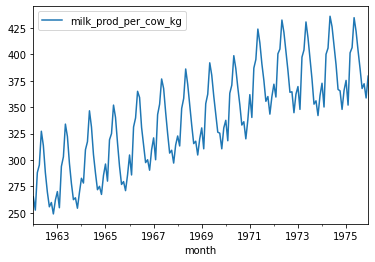

In [92]:
df.plot()

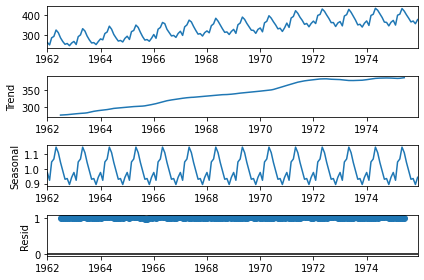

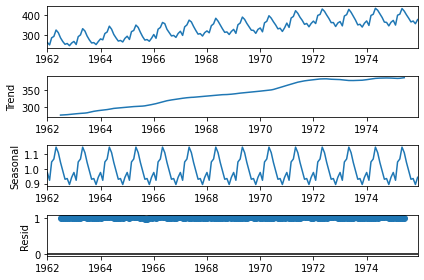

In [93]:
result = seasonal_decompose(df, model='multiplicative')
result.plot()

<AxesSubplot:xlabel='month'>

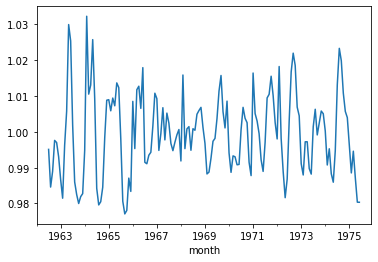

In [94]:
result.resid.plot()

In [95]:
result.resid.sum()

155.91800070268286

<AxesSubplot:xlabel='month'>

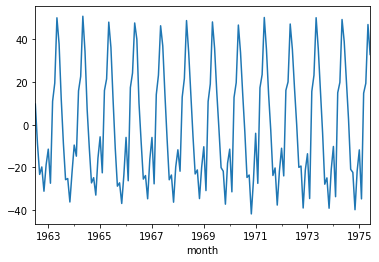

In [96]:
data = df.milk_prod_per_cow_kg - result.seasonal - result.trend
data = data.dropna()

data.plot()

In [97]:
from statsmodels.tsa.api import SimpleExpSmoothing

ses = SimpleExpSmoothing(data)

D:\Anaconda\Anaconda_Instalado\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\Anaconda_Instalado\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [98]:
alpha = 0.2
model = ses.fit(smoothing_level = alpha, optimized = False)

In [99]:
model.summary()

Dep. Variable:,None,No. Observations:,156
Model:,SimpleExpSmoothing,SSE,116823.666
Optimized:,False,AIC,1036.496
Trend:,None,BIC,1042.596
Seasonal:,None,AICC,1036.761
Seasonal Periods:,None,Date:,"Sun, 19 Jun 2022"
Box-Cox:,False,Time:,19:09:03
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2000000,alpha,False
initial_level,9.6625256,l.0,False


In [100]:
forcast = model.forecast(3)
forcast

D:\Anaconda\Anaconda_Instalado\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1975-07-01    11.674527
1975-08-01    11.674527
1975-09-01    11.674527
Freq: MS, dtype: float64

In [102]:
ses2 = SimpleExpSmoothing(data)
model = ses2.fit()
forcast2 = model.forecast(3)
forcast2

D:\Anaconda\Anaconda_Instalado\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


1975-07-01    32.902946
1975-08-01    32.902946
1975-09-01    32.902946
Freq: MS, dtype: float64

In [103]:
df = pd.read_excel('inputs/single-family-home-sales.xlsx')
df

,Month,Home Sales,Alpha .8,Forecast,Alpha .6,Forecast.1,Alpha .2,Forecast.2
0,1990-01,45.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-02,50.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-03,58.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-04,52.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-05,50.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
67,1995-08,63.0,NaN,NaN,NaN,NaN,NaN,NaN
68,1995-09,55.0,NaN,NaN,NaN,NaN,NaN,NaN
69,1995-10,54.0,NaN,NaN,NaN,NaN,NaN,NaN
70,1995-11,44.0,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
df.index

RangeIndex(start=0, stop=72, step=1)

In [105]:
df['ts'] = df.index

In [106]:
df['Alpha .8'] = .8*(1-.8)**df['ts']

In [107]:
df

,Month,Home Sales,Alpha .8,Forecast,Alpha .6,Forecast.1,Alpha .2,Forecast.2,ts
0,1990-01,45.0,8.000000e-01,NaN,NaN,NaN,NaN,NaN,0
1,1990-02,50.0,1.600000e-01,NaN,NaN,NaN,NaN,NaN,1
2,1990-03,58.0,3.200000e-02,NaN,NaN,NaN,NaN,NaN,2
3,1990-04,52.0,6.400000e-03,NaN,NaN,NaN,NaN,NaN,3
4,1990-05,50.0,1.280000e-03,NaN,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...
67,1995-08,63.0,1.180592e-47,NaN,NaN,NaN,NaN,NaN,67
68,1995-09,55.0,2.361183e-48,NaN,NaN,NaN,NaN,NaN,68
69,1995-10,54.0,4.722366e-49,NaN,NaN,NaN,NaN,NaN,69
70,1995-11,44.0,9.444733e-50,NaN,NaN,NaN,NaN,NaN,70


In [108]:
df['Alpha .8'].sum()

1.0

In [109]:
df['Forecast'] = df['Alpha .8']*df['Home Sales'] 
df

,Month,Home Sales,Alpha .8,Forecast,Alpha .6,Forecast.1,Alpha .2,Forecast.2,ts
0,1990-01,45.0,8.000000e-01,3.600000e+01,NaN,NaN,NaN,NaN,0
1,1990-02,50.0,1.600000e-01,8.000000e+00,NaN,NaN,NaN,NaN,1
2,1990-03,58.0,3.200000e-02,1.856000e+00,NaN,NaN,NaN,NaN,2
3,1990-04,52.0,6.400000e-03,3.328000e-01,NaN,NaN,NaN,NaN,3
4,1990-05,50.0,1.280000e-03,6.400000e-02,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...
67,1995-08,63.0,1.180592e-47,7.437727e-46,NaN,NaN,NaN,NaN,67
68,1995-09,55.0,2.361183e-48,1.298651e-46,NaN,NaN,NaN,NaN,68
69,1995-10,54.0,4.722366e-49,2.550078e-47,NaN,NaN,NaN,NaN,69
70,1995-11,44.0,9.444733e-50,4.155683e-48,NaN,NaN,NaN,NaN,70


In [110]:
df['Forecast'].sum()

46.268522611676616

In [111]:
df['Alpha .6'] = .6*(1-.6)**df['ts']
df['Forecast.1'] = df['Alpha .6']*df['Home Sales'] 
df['Forecast.1'].sum()

47.82248683444809

In [112]:
df['Alpha .2'] = .2*(1-.2)**df['ts']
df['Forecast.2'] = df['Alpha .2']*df['Home Sales'] 
df['Forecast.2'].sum()

47.81091915848141

In [113]:
df = pd.read_excel('inputs/bookings.csv.xlsx')
df

,Year,Month,Bookings
0,2006.0,Jan,383.0
1,2006.0,Feb,366.0
2,2006.0,Mar,250.0
3,2006.0,Apr,318.0
4,2006.0,May,334.0
...,...,...,...
115,2015.0,Aug,18478.0
116,2015.0,Sep,12004.0
117,2015.0,Oct,9789.0
118,2015.0,Nov,10003.0


In [114]:
def month_to_number(a):
    if a == 'Jan':
        return '01'
    elif a == 'Feb':
        return '02'
    elif a == 'Mar':
        return '03'
    elif a == 'Apr':
        return '04'
    elif a == 'May':
        return '05'
    elif a == 'Jun':
        return '06'
    elif a == 'Jul':
        return '07'
    elif a == 'Aug':
        return '08'
    elif a == 'Sep':
        return '09'
    elif a == 'Oct':
        return '10'
    elif a == 'Nov':
        return '11'
    elif a == 'Dec':
        return '12'
        

In [115]:
df['YYYMM'] = df['Year'].astype(int).astype(str)+'-'+df['Month'].map(month_to_number)+'-01'

In [116]:
df

,Year,Month,Bookings,YYYMM
0,2006.0,Jan,383.0,2006-01-01
1,2006.0,Feb,366.0,2006-02-01
2,2006.0,Mar,250.0,2006-03-01
3,2006.0,Apr,318.0,2006-04-01
4,2006.0,May,334.0,2006-05-01
...,...,...,...,...
115,2015.0,Aug,18478.0,2015-08-01
116,2015.0,Sep,12004.0,2015-09-01
117,2015.0,Oct,9789.0,2015-10-01
118,2015.0,Nov,10003.0,2015-11-01


In [117]:
df.Year = pd.to_datetime(df['YYYMM'])
df

,Year,Month,Bookings,YYYMM
0,2006-01-01,Jan,383.0,2006-01-01
1,2006-02-01,Feb,366.0,2006-02-01
2,2006-03-01,Mar,250.0,2006-03-01
3,2006-04-01,Apr,318.0,2006-04-01
4,2006-05-01,May,334.0,2006-05-01
...,...,...,...,...
115,2015-08-01,Aug,18478.0,2015-08-01
116,2015-09-01,Sep,12004.0,2015-09-01
117,2015-10-01,Oct,9789.0,2015-10-01
118,2015-11-01,Nov,10003.0,2015-11-01


In [118]:
df = df.set_index('Year')

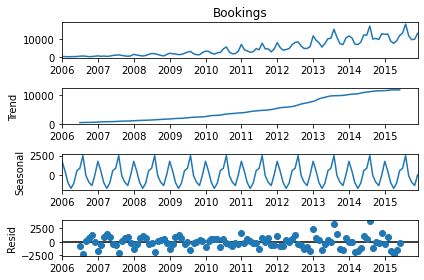

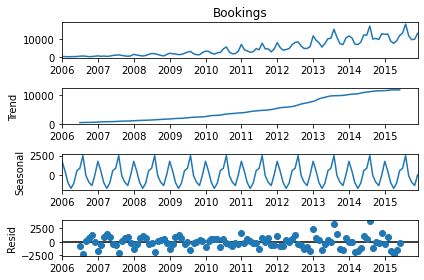

In [119]:

seasonal_decompose(df['Bookings']).plot()

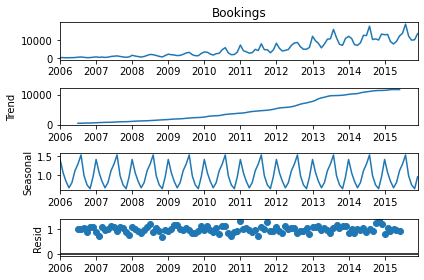

In [132]:
seasonal_decompose(df['Bookings'], model='multiplicative').plot()
plt.show()

In [133]:
df = pd.read_excel('inputs/weekly-sales-differencing.xlsx')

In [134]:
df

,Week,Weekly Sales of a Cutting Tool,First Difference,Second Difference
0,1,100,NaN,NaN
1,2,94,NaN,NaN
2,3,90,NaN,NaN
3,4,96,NaN,NaN
4,5,91,NaN,NaN
...,...,...,...,...
95,44,133,NaN,NaN
96,45,132,NaN,NaN
97,46,129,NaN,NaN
98,47,135,NaN,NaN


In [136]:
df['First Difference'] = df['Weekly Sales of a Cutting Tool'].diff()

In [137]:
df

,Week,Weekly Sales of a Cutting Tool,First Difference,Second Difference
0,1,100,NaN,NaN
1,2,94,-6.0,NaN
2,3,90,-4.0,NaN
3,4,96,6.0,NaN
4,5,91,-5.0,NaN
...,...,...,...,...
95,44,133,3.0,NaN
96,45,132,-1.0,NaN
97,46,129,-3.0,NaN
98,47,135,6.0,NaN


In [138]:
df['Second Difference'] = df['First Difference'].diff()

In [142]:
df.iloc[15]

Week                              16.0
Weekly Sales of a Cutting Tool    98.0
First Difference                   2.0
Second Difference                  4.0
Name: 15, dtype: float64